## Student Performance Indicator

**Life cycle of Machine Learning Project**

- Understanding the problem statement
- Data Collection
- Data checks to perform
- Exploratory data analysis
- Data pre-processing
- Model Training
- Choose best model

**Problem Statement**
- This projects understands how the student's performance (test scores) is affected by other variables such as gender,ethnicity, parental level of education, lunch and test preparation course.

**Data Collection**
- Data Source - https://www.kaggle.com/datasets/yogeshkasar778/student-performance-dataset
- The data consists of 8 column and 1000 rows


**Import Data and Required packages**

Importing pandas, numpy, matplotlib, seaborn and warings library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import csv Data as pandas Data frame

In [3]:
data=pd.read_csv('data\Students_Performance.csv')

Top five records

In [4]:
data.head(5)

,Gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [5]:
data.shape

(1000, 8)

**Dataset information**

- gender: sex of students ->(Male/Female)
- race_ethnicity: enthnicity of students ->(Group A,B,C,D,E)
- parental level of education: parents final educations ->(bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch: having before test (standard or free/reduced)
- test_preparation course: complete or not complete before test
- math score
- reading score
- writing score

**Data checks to perform**

- Check missing values
- Check duplicates
- Check data types
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

Check the missing values

In [6]:
data.isna().sum()

Gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing values in the dataset

Chech the duplicates

In [7]:
data.duplicated().sum()

0

There is no duplicates values in the dataset

Check data types

In [8]:
#check null and dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking the number of unique values of the each column

In [9]:
data.nunique()

Gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Check statstitics of the dataset

In [10]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**

- from above description of numerical data, all means are very close to each other between 66 and 68.05
- All standard deviations are also close - between 14.6 and 15.16
- while there is a minimum score 0 for math, for writing minimum is much higher =10 and for reading myet higher =17.

**Exploring data**

In [11]:
print("Categories in 'Gender' variable:   ",end="  ")
print(data['Gender'].unique())

print("Categories in 'race_ethnicity' variable:   ",end="  ")
print(data['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable:   ",end="  ")
print(data['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:   ",end="  ")
print(data['lunch'].unique())

print("Categories in 'test preparation course' variable:   ",end="  ")
print(data['test_preparation_course'].unique())

Categories in 'Gender' variable:     ['female' 'male']
Categories in 'race_ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:     ['standard' 'free/reduced']
Categories in 'test preparation course' variable:     ['none' 'completed']


In [12]:
#Define numerical and categorical columns
numeric_features=[feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features=[feature for feature in data.columns if data[feature].dtype == 'O']

#print columns
print('We have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['Gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
data.head(2)

,Gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


Adding columns for "Total Score" and "Average"

In [14]:
data['total_score']=data['math_score']+data['reading_score']+data['writing_score']
data['average']=data['total_score']/3
data.head()

,Gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full=data[data['reading_score']==100]['average'].count()
writing_full=data[data['writing_score']==100]['average'].count()
math_full=data[data['math_score']==100]['average'].count()

print(f'number of students with full marks in Maths: {math_full}')
print(f'number of students with full marks in Writing: {writing_full}')
print(f'number of students with full marks in Reading: {reading_full}')

number of students with full marks in Maths: 7
number of students with full marks in Writing: 14
number of students with full marks in Reading: 17


In [16]:
reading_leas_20=data[data['reading_score']<=20]['average'].count()
writing_leas_20=data[data['writing_score']<=20]['average'].count()
maths_leas_20=data[data['math_score']<=20]['average'].count()

print(f'number of students with less than 20marks in Math: {maths_leas_20}')
print(f'number of students with less than 20marks in Writing: {writing_leas_20}')
print(f'number of students with less than 20marks in Reading: {reading_leas_20}')

number of students with less than 20marks in Math: 4
number of students with less than 20marks in Writing: 3
number of students with less than 20marks in Reading: 1


**Insight**

- from above values we get students have performed the worst in maths
- best performance is in reading section

**Exploring Data (Visualization)**

Visualize average score distribution to make some conclusion

- Histogram
- Kernel Distribution Function (KDE)

**Histogram and KDE**

Visualize average of Gender

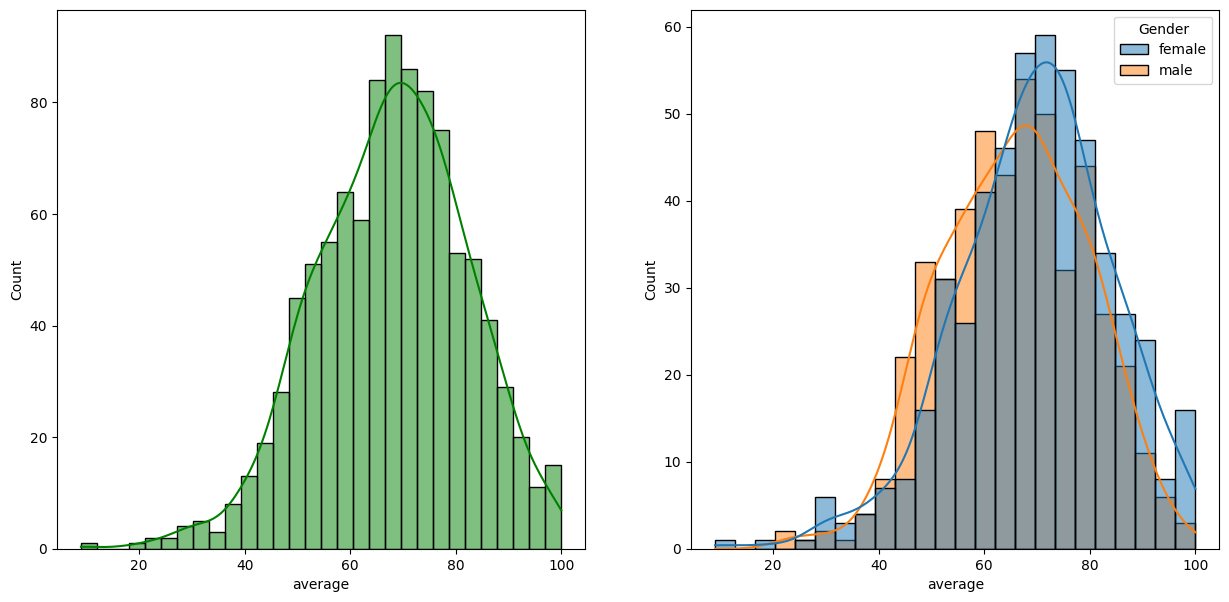

In [17]:
fig, axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=data, x='average',kde=True, hue='Gender')
plt.show()

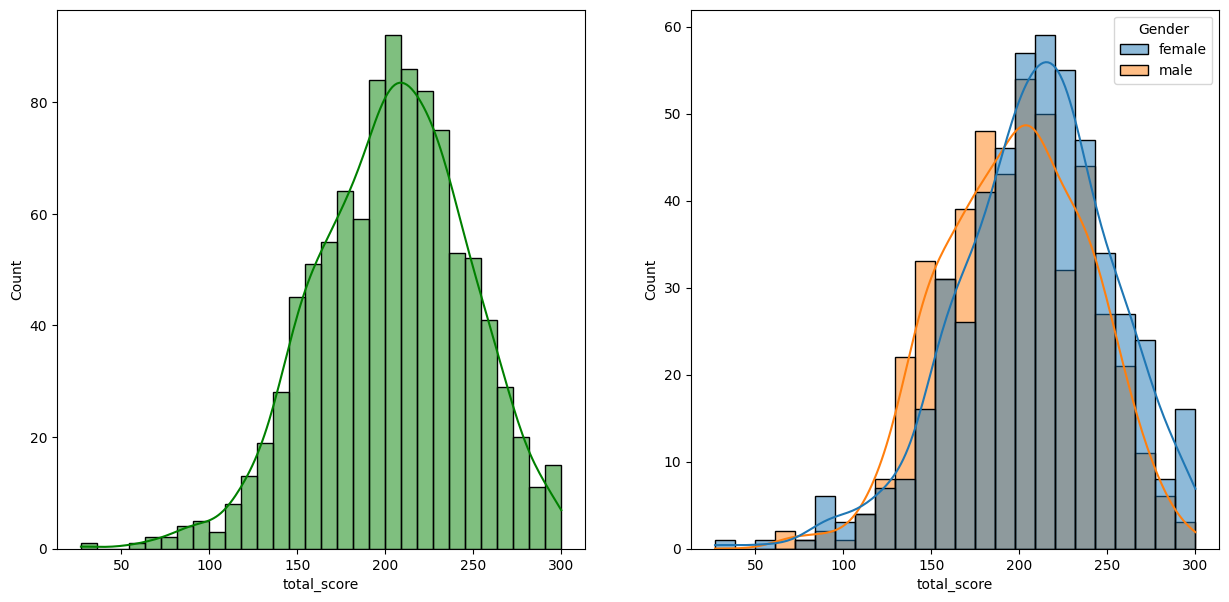

In [18]:
fig, axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=data, x='total_score',kde=True, hue='Gender')
plt.show()

Insight

- female students tend to perform well then male students.

Visualize average of lunch

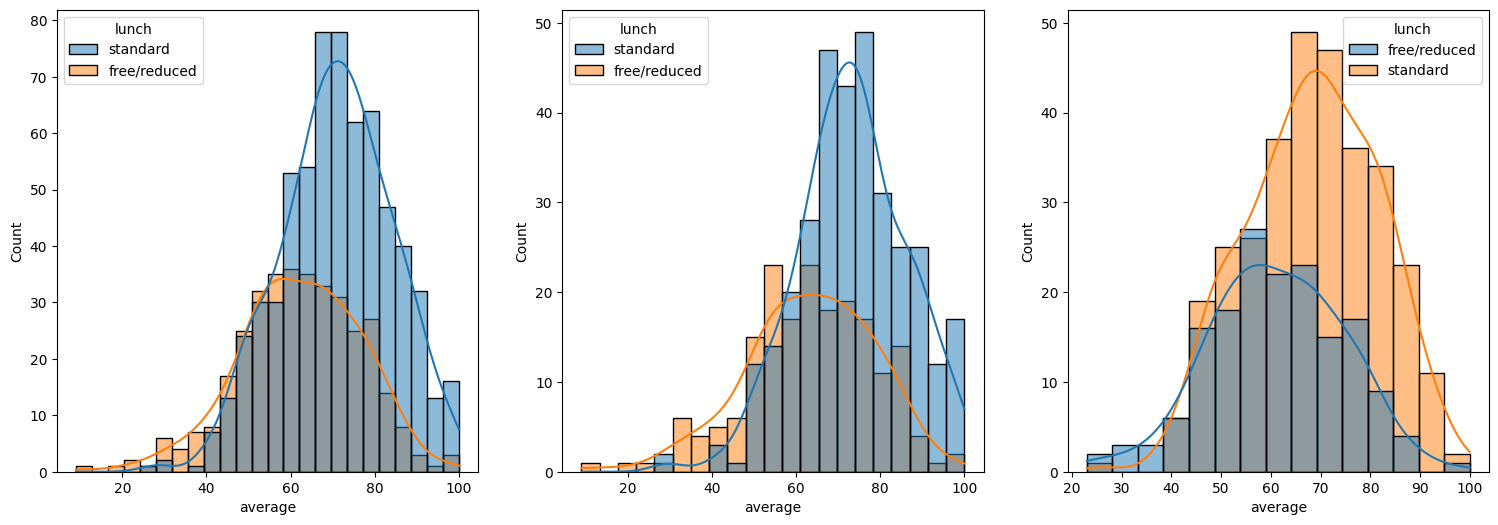

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data, x='average',kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=data[data.Gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=data[data.Gender=='male'], x='average', kde=True, hue='lunch')
plt.show()

Insight

- standard lunch helps perform well in exams.
- standard lunch helps perform well in exam be it a male or female.

Visualize average of Parental level of education

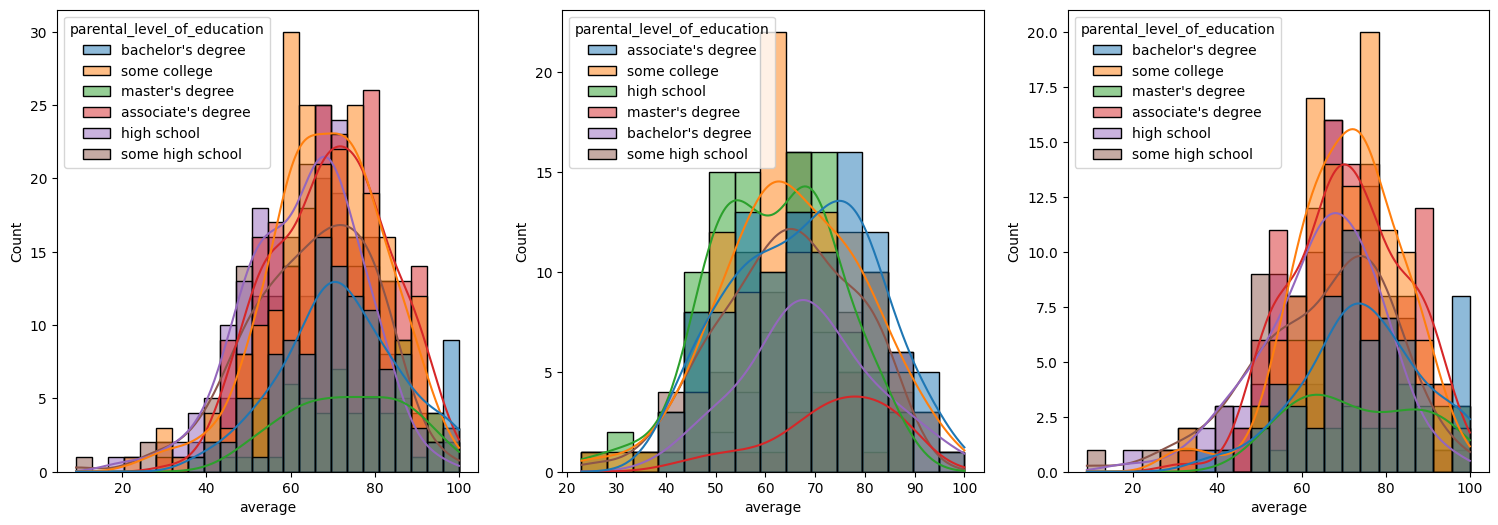

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=data, x='average',kde=True, hue='parental_level_of_education')
plt.subplot(142)
ax=sns.histplot(data=data[data.Gender=='male'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(143)
ax=sns.histplot(data=data[data.Gender=='female'], x='average', kde=True, hue='parental_level_of_education')
plt.show()

Insight

- IN general parent's education don't help student perform well in exam.
- Second plot show that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.
- Third plot we can see there is no effect of parent's education on female students.

Visualize average of Race/Ethnicity

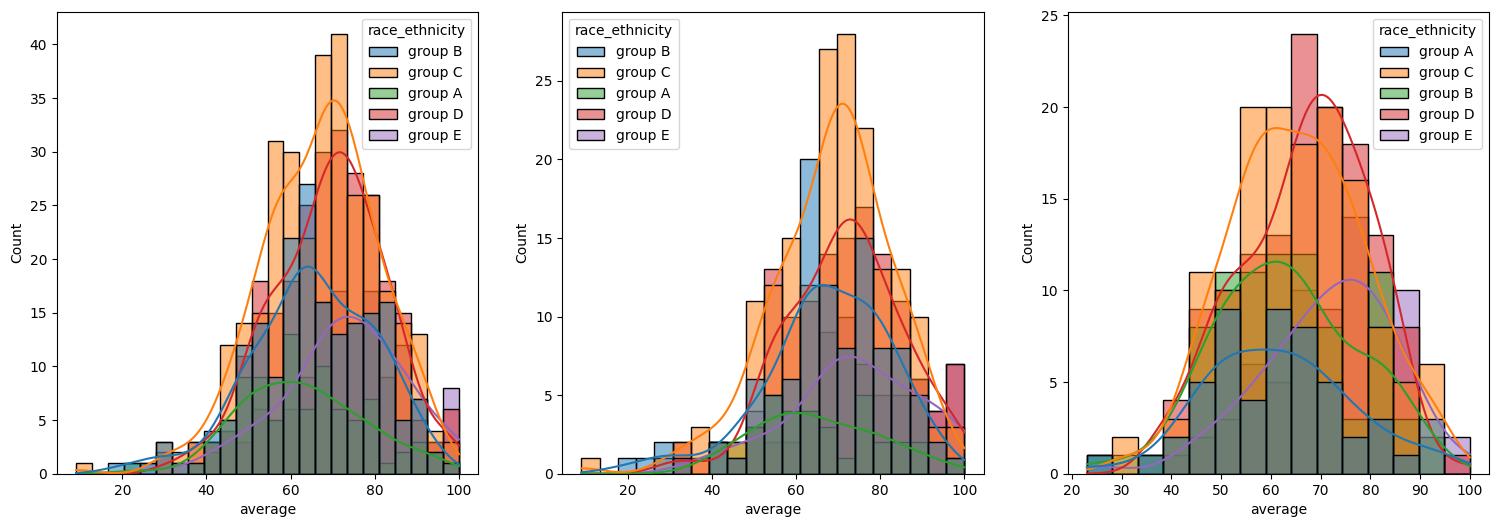

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=data, x='average',kde=True, hue='race_ethnicity')
plt.subplot(142)
ax=sns.histplot(data=data[data.Gender=='female'], x='average', kde=True, hue='race_ethnicity')
plt.subplot(143)
ax=sns.histplot(data=data[data.Gender=='male'], x='average', kde=True, hue='race_ethnicity')
plt.show()

Insight

- Students of group A and group B tends to perform poorly in exam.
- Students group A and group B tends to perform poorly in exam irrespective of whether they are male or female.

**Maximum score of students in all three subjects**

<Axes: title={'center': 'Writing Scores'}, ylabel='writing_score'>

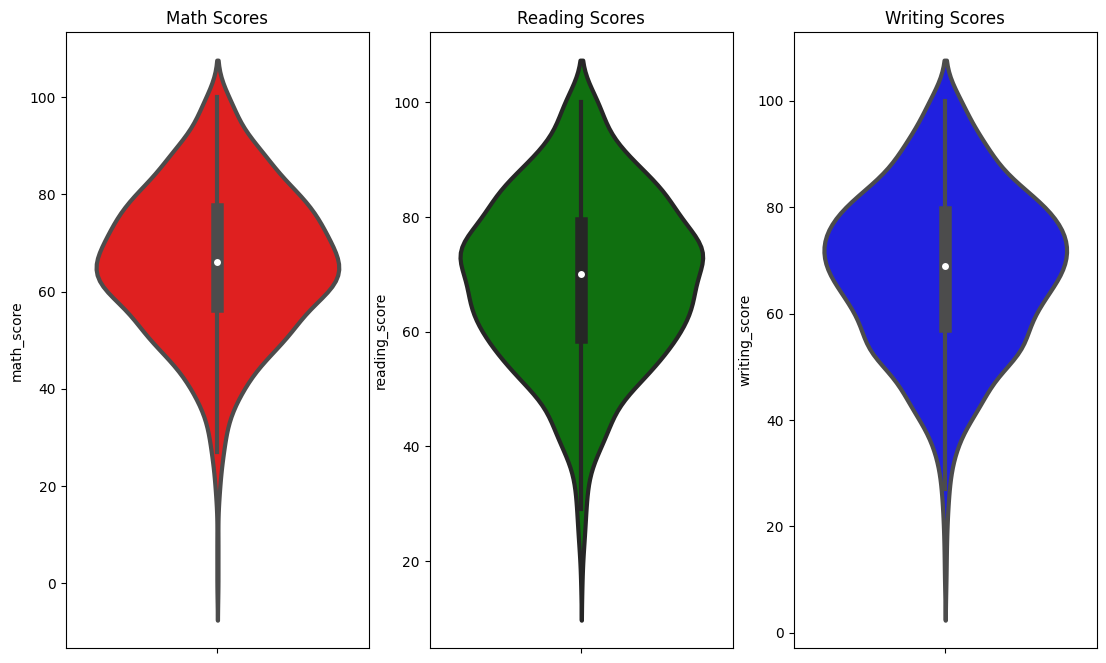

In [47]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.violinplot(y='math_score',data=data,color='red',linewidth=3)

plt.subplot(1,4,2)
plt.title('Reading Scores')
sns.violinplot(y='reading_score',data=data,color='green',linewidth=3)

plt.subplot(1,4,3)
plt.title('Writing Scores')
sns.violinplot(y='writing_score',data=data,color='blue',linewidth=3)

Insight

- from the above three plots its clearly visible that most of the students score in between 60-80 in maths where as in reading and writing most  of them score from 50-80.

**Multivariate analysis using pieplot**

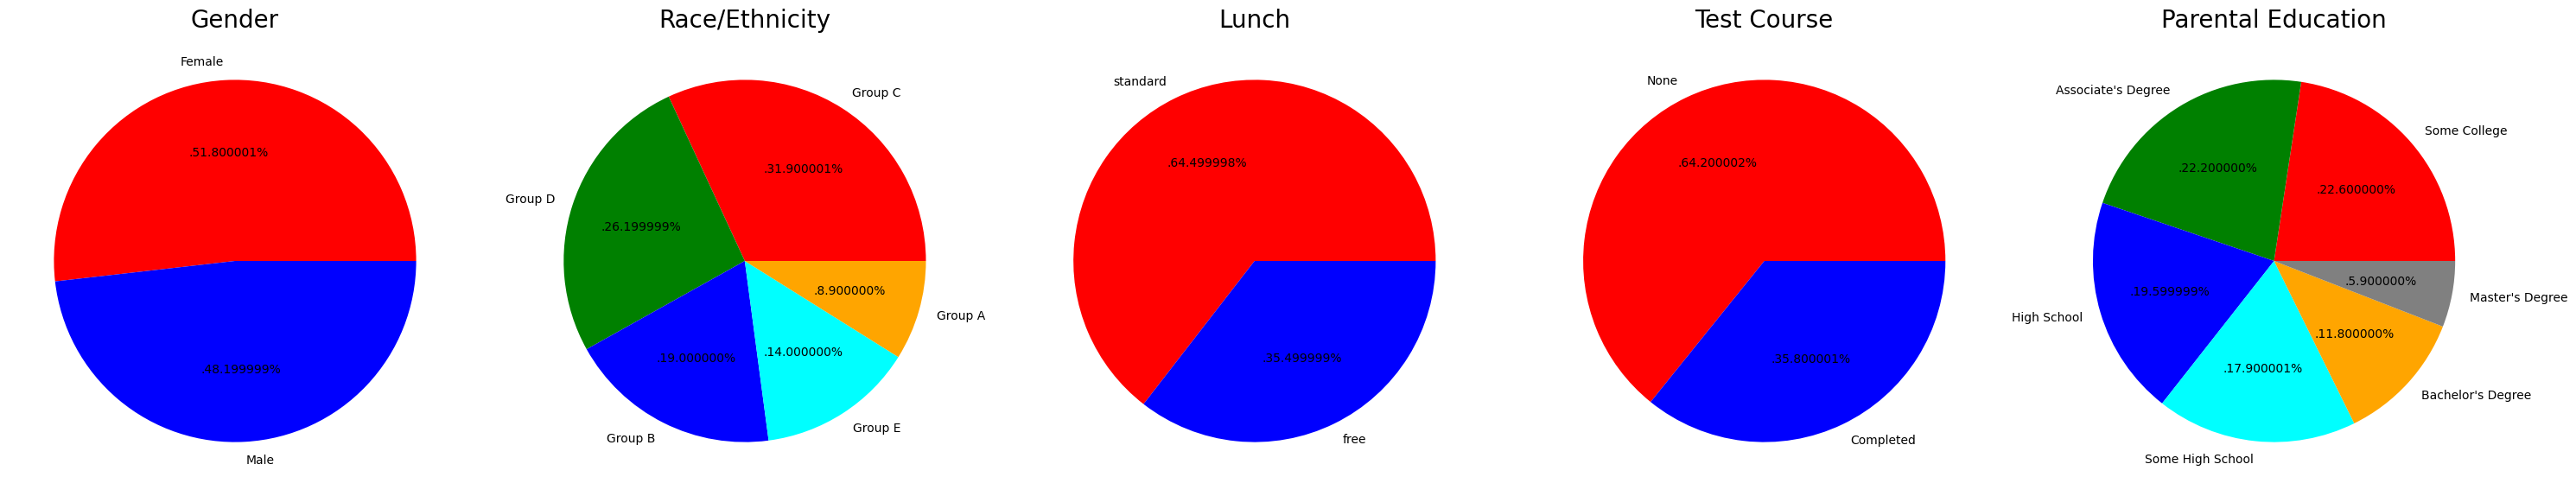

In [50]:
plt.rcParams['figure.figsize']=(30,12)
plt.subplot(1,5,1)
size=data['Gender'].value_counts()
labels='Female','Male'
color=['red','blue']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=data['race_ethnicity'].value_counts()
labels='Group C','Group D','Group B','Group E','Group A'
color=['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Race/Ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=data['lunch'].value_counts()
labels='standard','free'
color=['red','blue']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=data['test_preparation_course'].value_counts()
labels='None','Completed'
color=['red','blue']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Test Course',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size=data['parental_level_of_education'].value_counts()
labels='Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color=['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Parental Education',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

Insight

- Number of male and female students is almost equal
- Number of students are greatest in Group C
- Number of studentys who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is 'some college' is greater followed closed by 'Associates's degree'

**Feature Wise Visualization**

GENDER COLUMN
- How is distribution of Gender?
- is gender has any impact on student's performance?

**Univariate Analysis**

How is distribution of Gender?

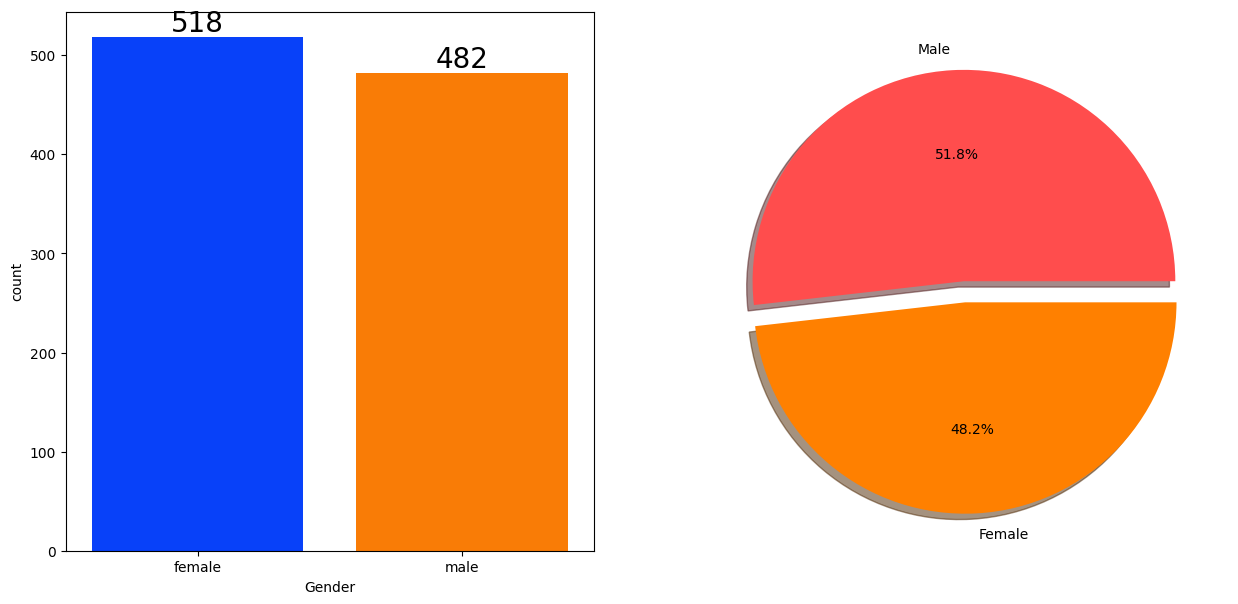

In [56]:
f,ax=plt.subplots(1,2,figsize=(15,7))
sns.countplot(x=data['Gender'],data=data,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=data['Gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insight

- Gender has balanced data with female students are 518(48%) and male students are 482 (52%)

**Bivariate Analysis**

is gender has any impact on student's performance?

In [65]:
gender_group=data.groupby('Gender').mean()
gender_group


,math_score,reading_score,writing_score,total_score,average
Gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


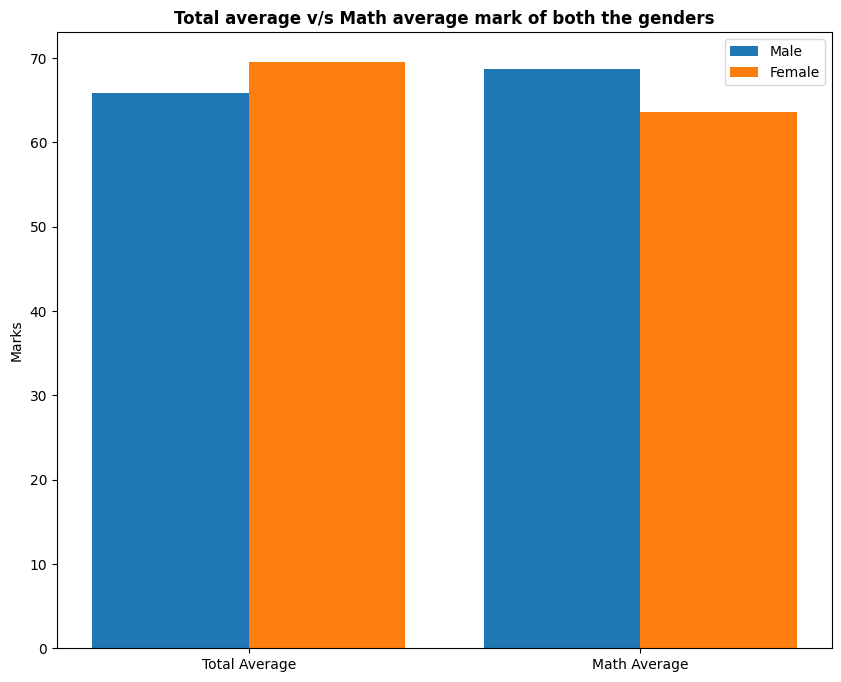

In [58]:
plt.figure(figsize=(10,8))

X=['Total Average', 'Math Average']

female_scores=[gender_group['average'][0],gender_group['math_score'][0]]
male_scores=[gender_group['average'][1],gender_group['math_score'][1]]

X_axis=np.arange(len(X))

plt.bar(X_axis-0.2,male_scores,0.4,label='Male')
plt.bar(X_axis+0.2,female_scores,0.4,label='Female')

plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average mark of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insight

- On an averages females have a better overall score than men
- where as male have scored higher in maths

RACE/ETHNICITY COLUMN

- How is group wise distribution?
- is race/ethnicity has any impact on students performance?

**Univariate Analysis**

How is group wise distribution?

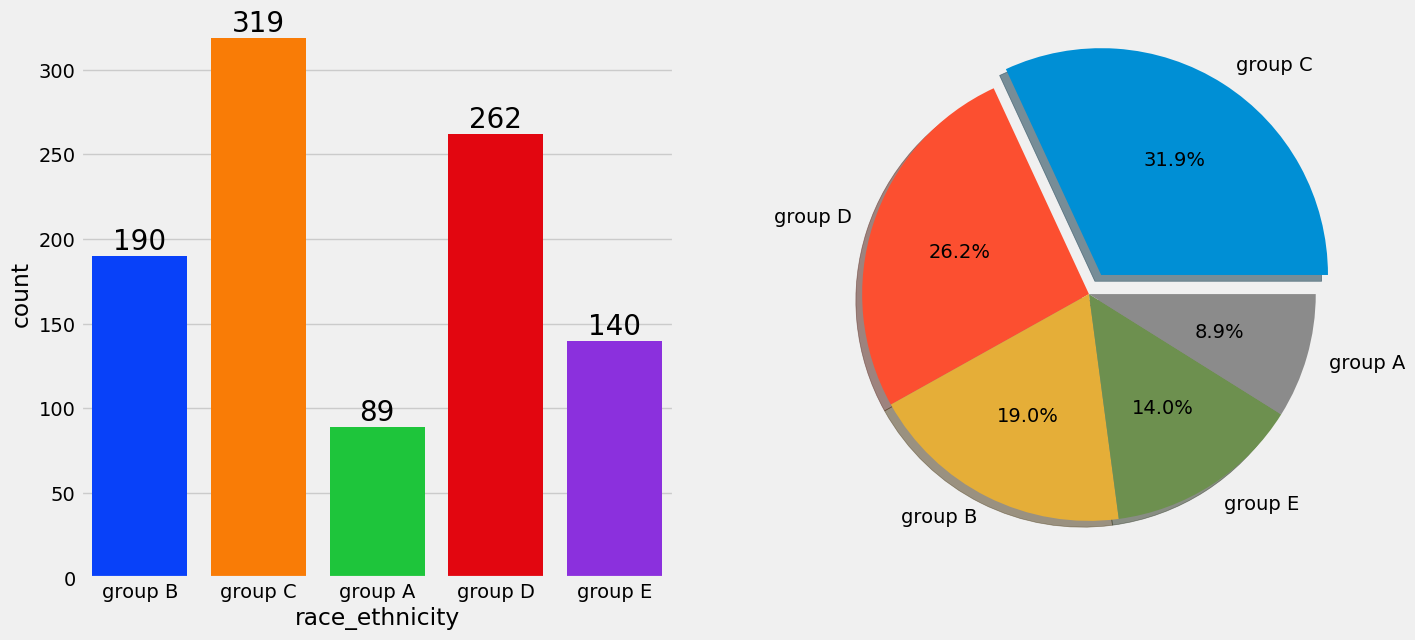

In [83]:
f,ax=plt.subplots(1,2,figsize=(15,7))
sns.countplot(x=data['race_ethnicity'],data=data,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x = data['race_ethnicity'].value_counts(),labels=data['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

Insight

- Most the students belonging from group c and group D
- Lowest number of the students belong to group A

**Bivariate Analysis**

is race/ethnicity has any impact on students performance?

In [66]:
Group_data2=data.groupby('race_ethnicity')

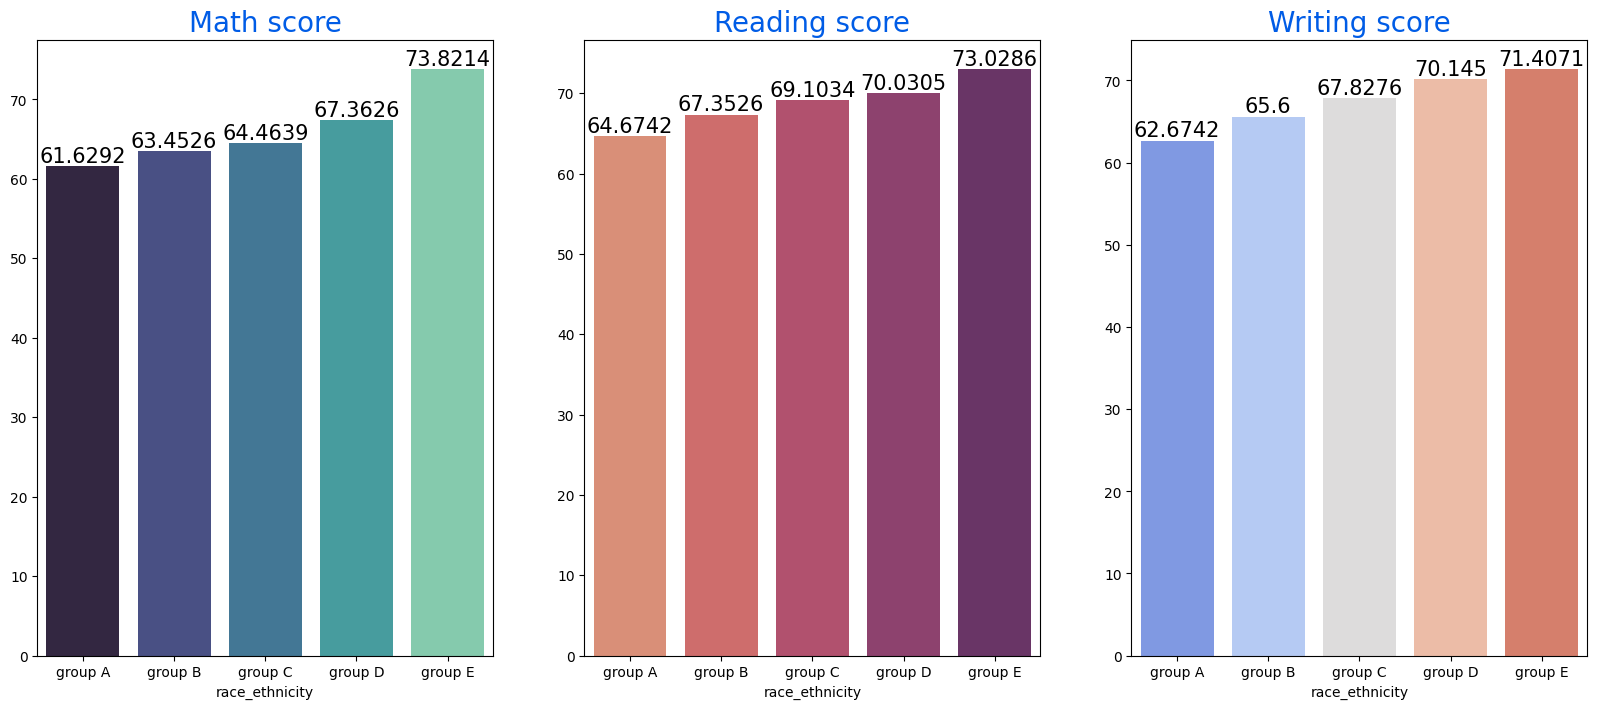

In [68]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insight

- Group E student have scored the highest marks
- Group A student have scored the lowest marks
- Students from a lower socioeconomic status have a lower avg in all course subjects

**PARENTAL LEVEL OF EDUCATION COLUMN**

- What is education background of student's parents?
- is parental education has any impact on student's performance?

**Univariate Analysis**

What is education background of student's parents?

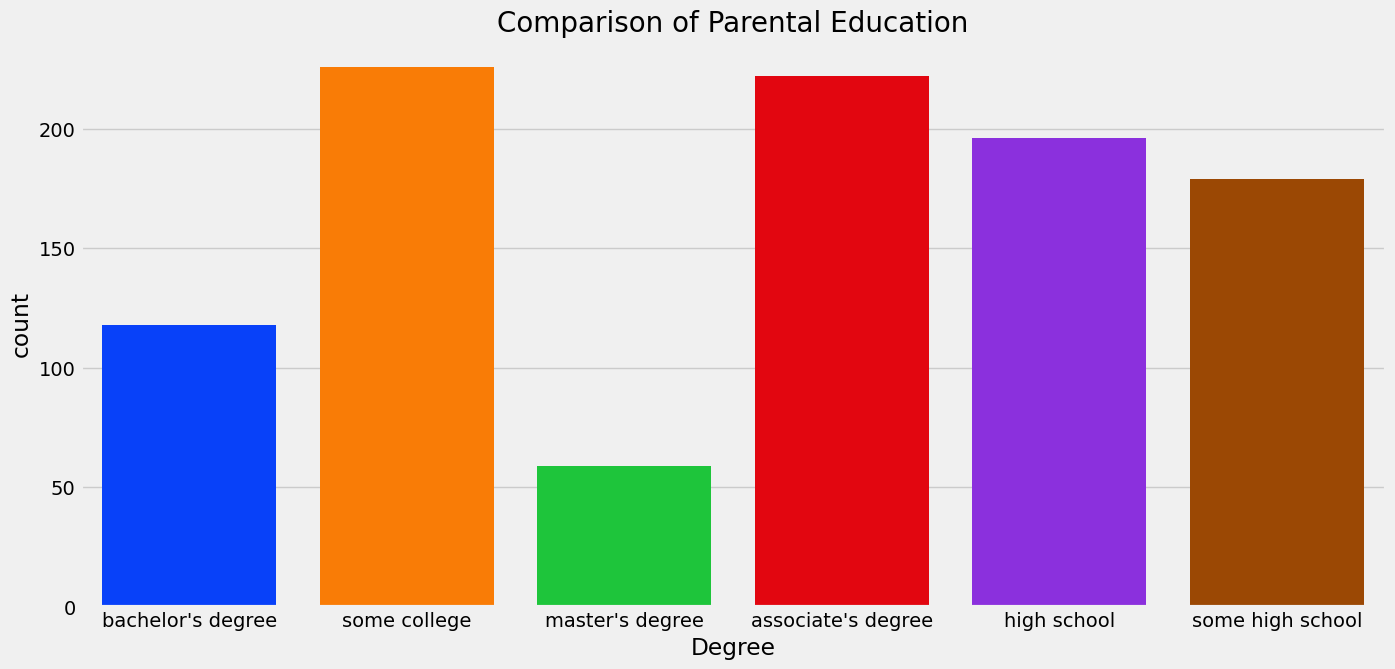

In [98]:
f,ax=plt.subplots(1,figsize=(15,7))
sns.countplot(x=data['parental_level_of_education'],data=data,palette='bright',ax=ax,saturation=0.95)
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()


Insight

- Largest number of parents are from some college.

**Bivariate Analysis**

is parental education has any impact on student's performance?

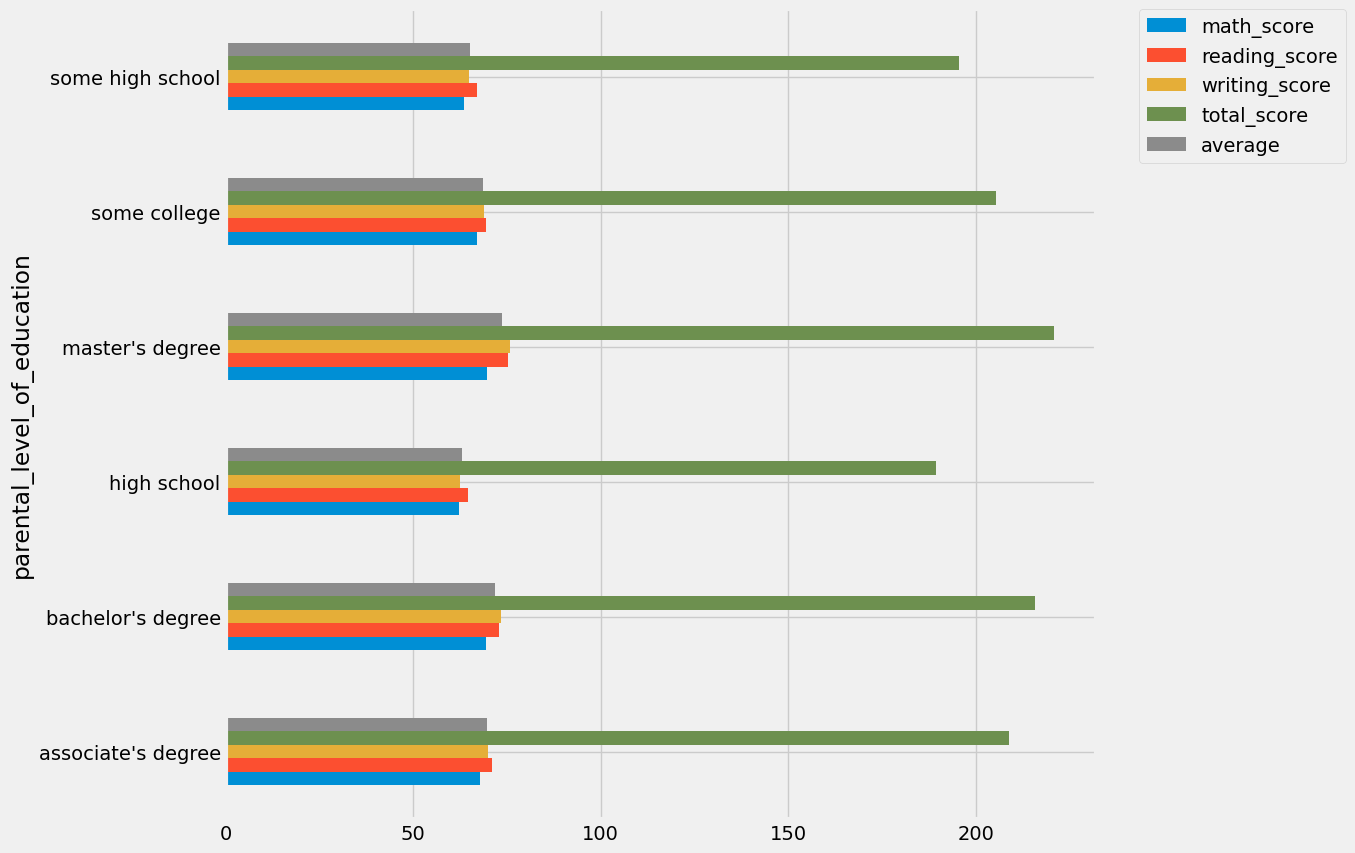

In [99]:
data.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Insight

- The score of student whose parents posses master and bachelor level education are higher than others.

**LUNCH COLUMN**

- Which type of lunch is most commen amoung students?
- What is the effect of lunch type on test results?

**Univariate Analysis**

 Which type of lunch is most commen amoung students?

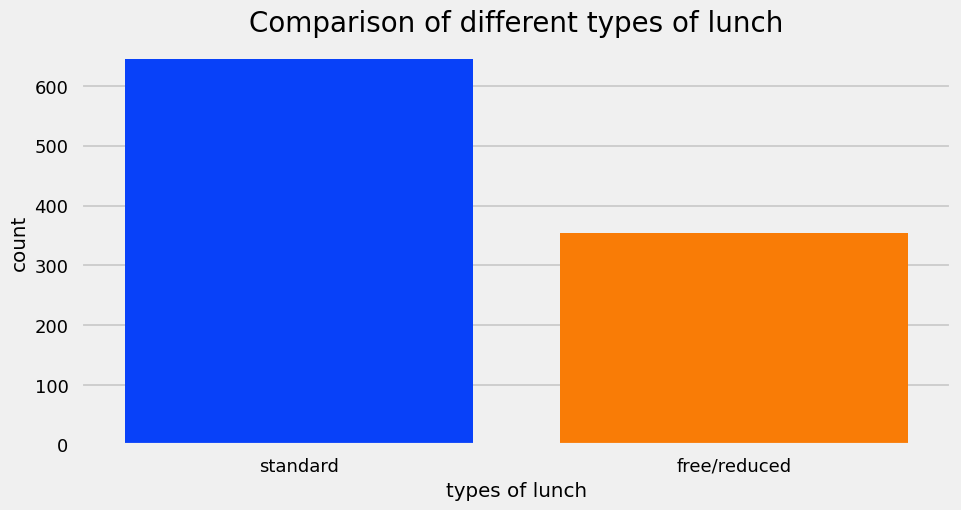

In [103]:
f,ax=plt.subplots(1,figsize=(10,5))
sns.countplot(x=data['lunch'],data=data,palette='bright',ax=ax,saturation=0.95)
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Insight

- Students being served Standard lunch was more than free lunch

**Bivariate Analysis**

What is the effect of lunch type on test results?

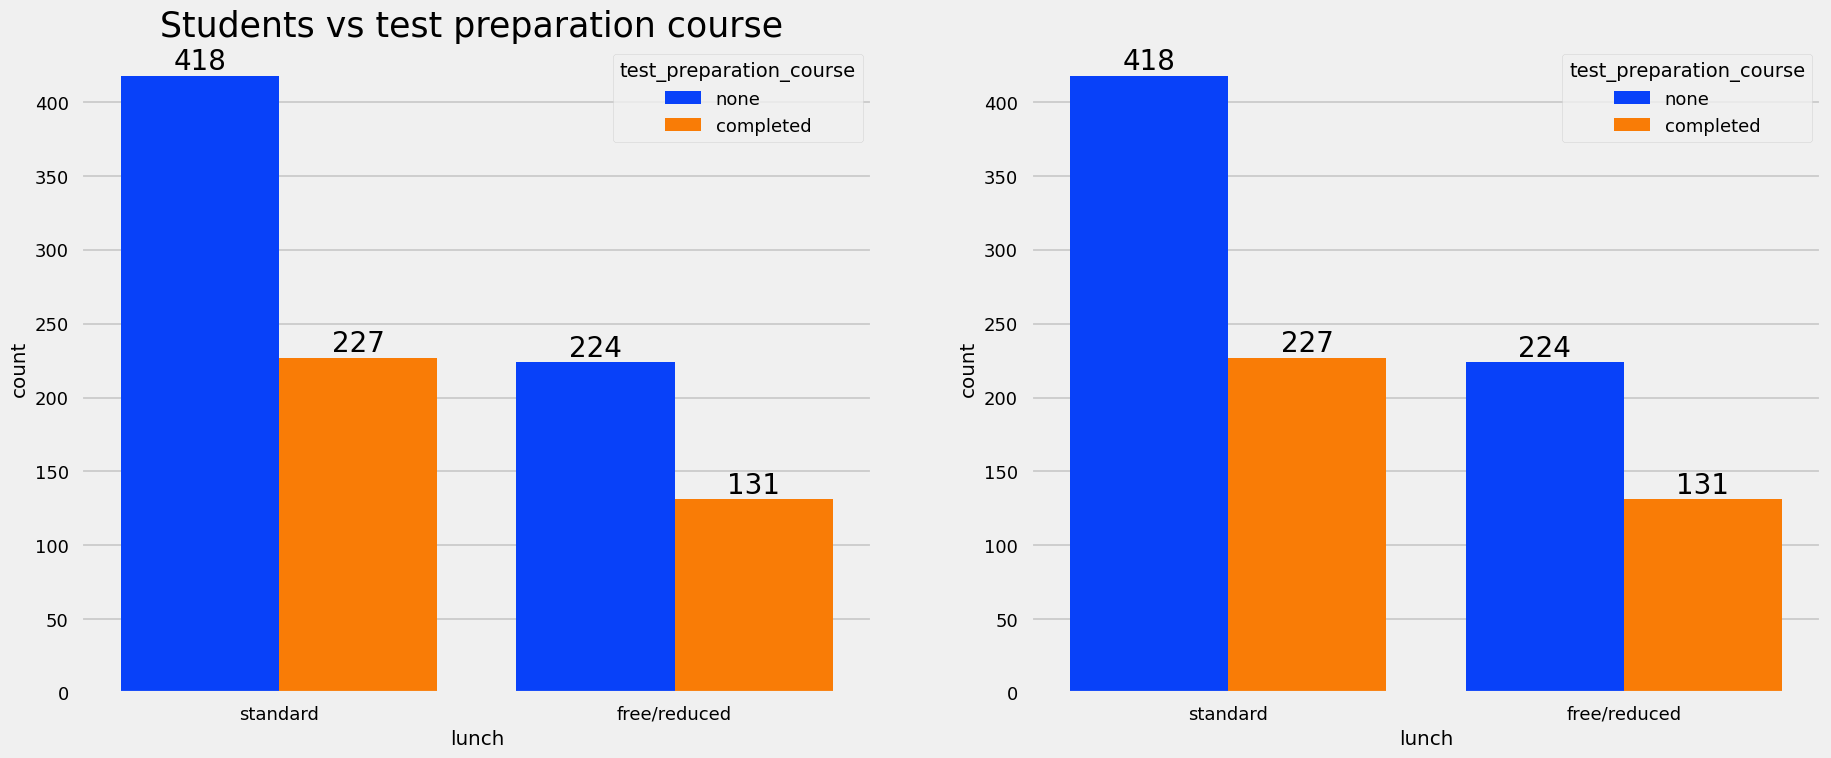

In [112]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=data['lunch'],data=data,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=data['lunch'],data=data,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

Insight

- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

**TEST PREPARATION COURSE COLUMN**

- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

**Bivariate Analysis** 

( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

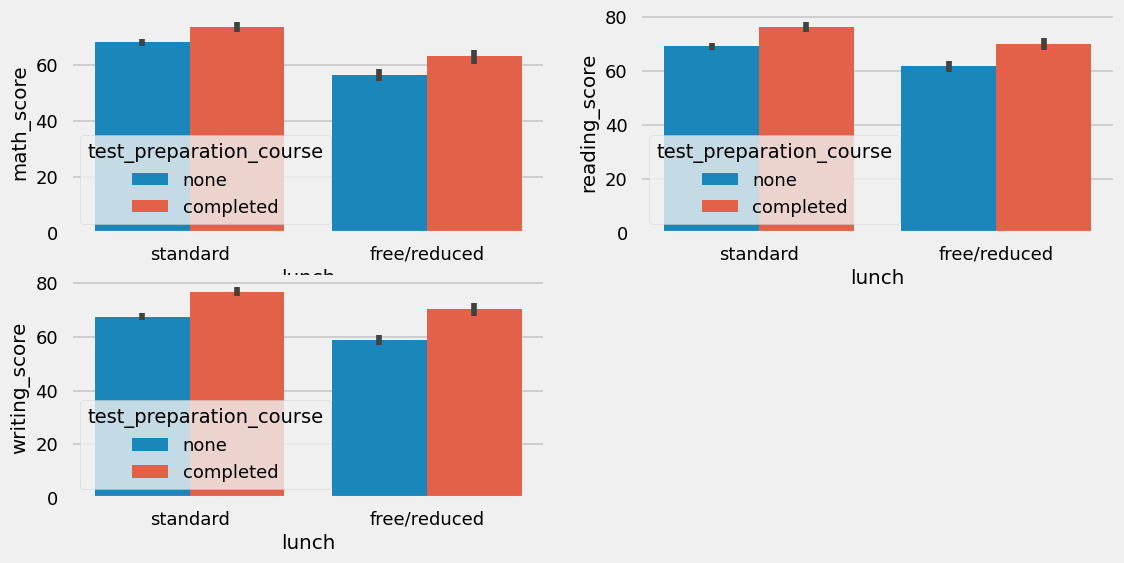

In [119]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=data['lunch'], y=data['math_score'], hue=data['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=data['lunch'], y=data['reading_score'], hue=data['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=data['lunch'], y=data['writing_score'], hue=data['test_preparation_course'])

Insight

- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

**Checking Outliers**


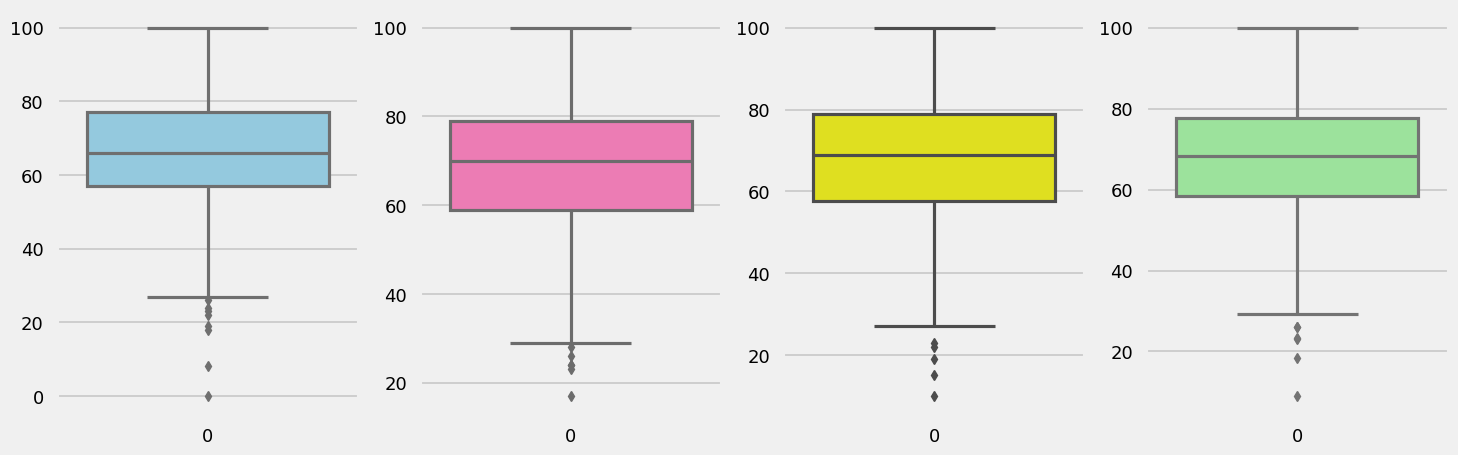

In [121]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['average'],color='lightgreen')
plt.show()

**Mutlivariate Analysis using pairplot**

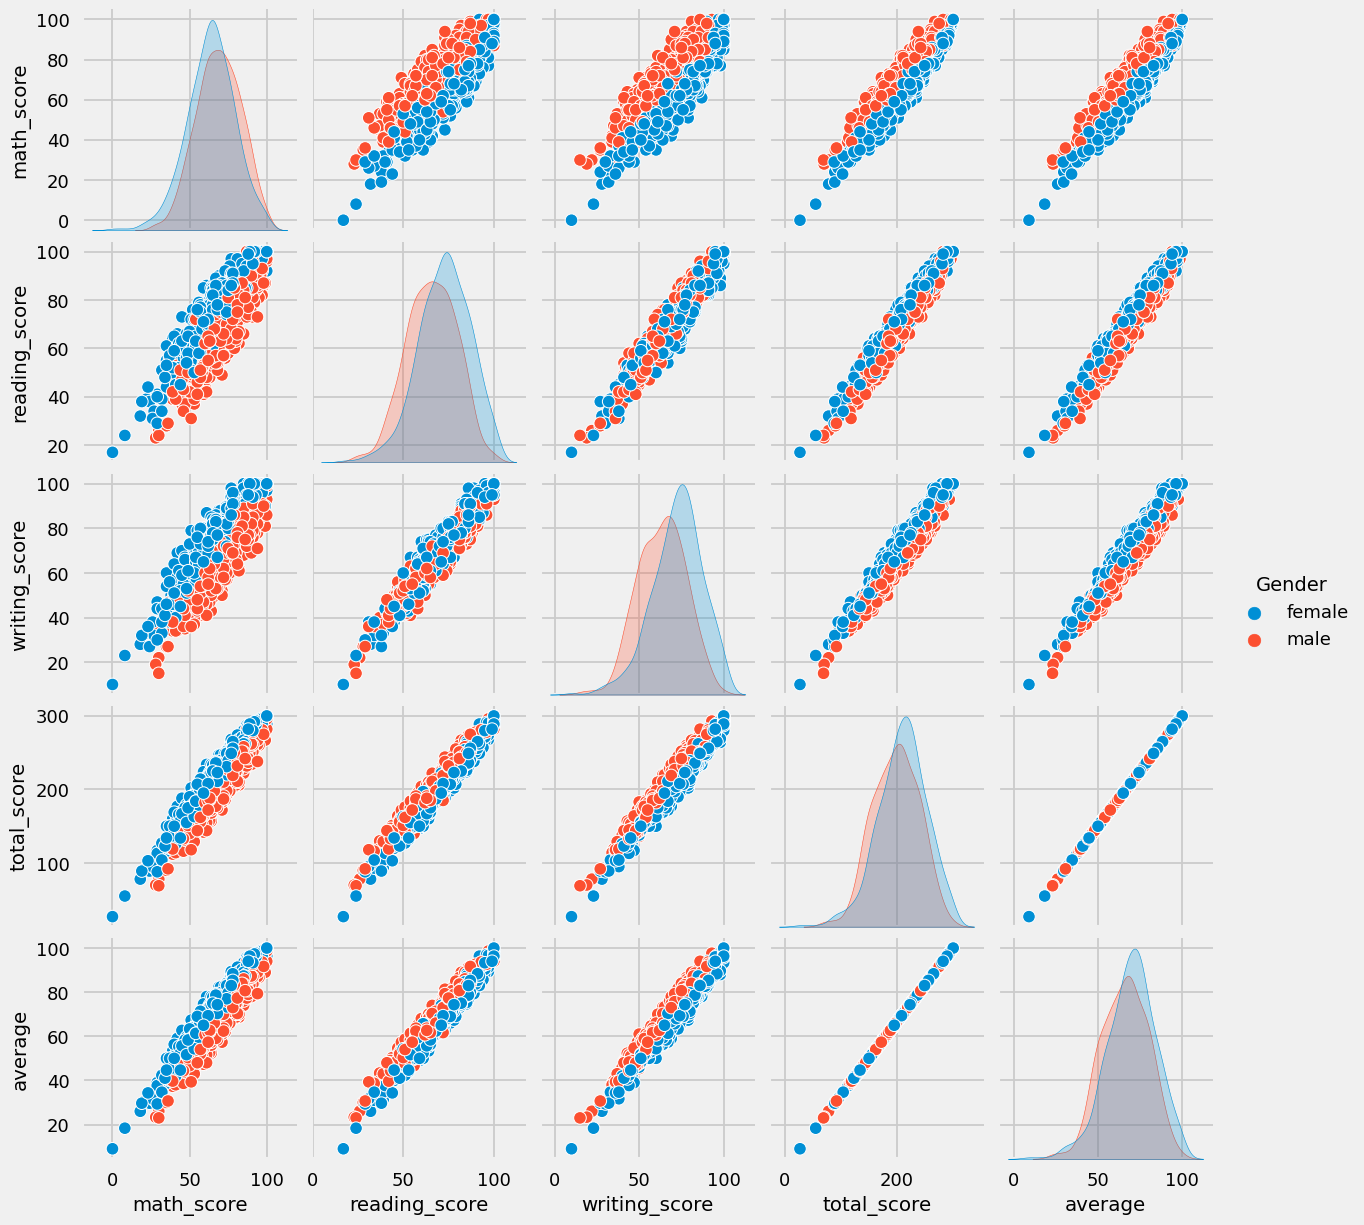

In [122]:
sns.pairplot(data,hue = 'Gender')
plt.show()

Insight

- From the above plot it is clear that all the scores increase linearly with each other.

**Conclusions**
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.